# Polynomial Regression

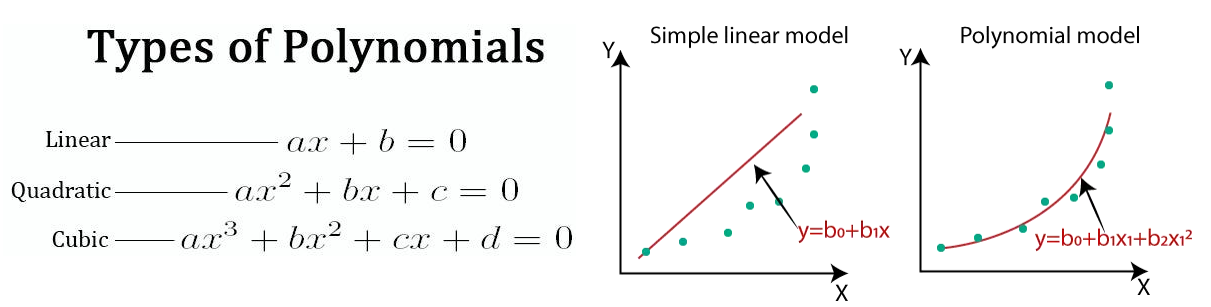
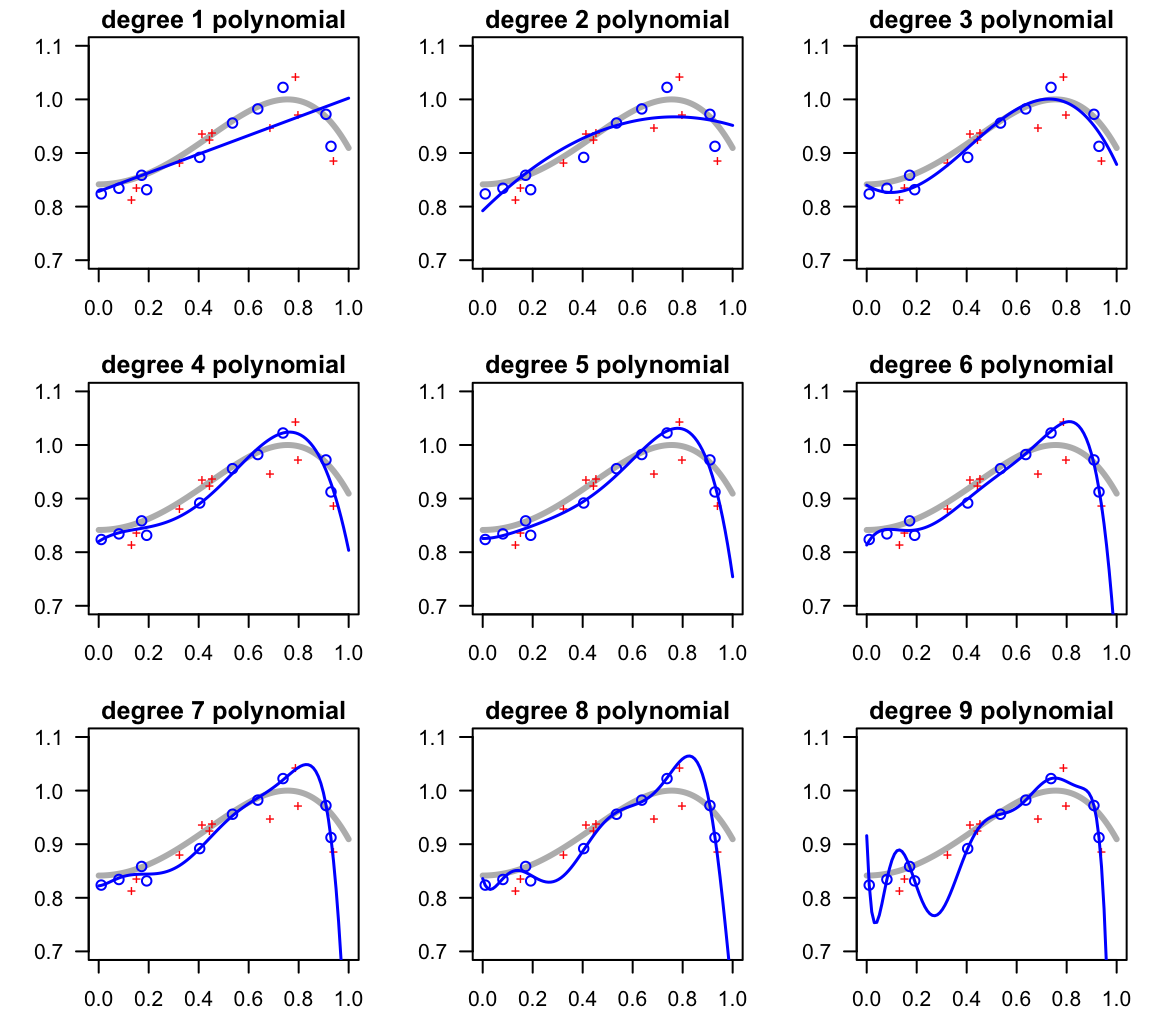


## Importing the libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [29]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [30]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training the Linear Regression model on the whole dataset

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

先透過 polynominal 建立高階項 再透過 LinearRegression 來 fit

In [44]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)

# show poly transform X data 
# y = b0 + b1*X + b2*X^2 + b3*X^3 + b4*X^4
print('after ploy transform X is {}:'.format(X_poly.astype(int)))

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

after ploy transform X is [[    1     1     1     1     1]
 [    1     2     4     8    16]
 [    1     3     9    27    81]
 [    1     4    16    64   256]
 [    1     5    25   125   625]
 [    1     6    36   216  1296]
 [    1     7    49   343  2401]
 [    1     8    64   512  4096]
 [    1     9    81   729  6561]
 [    1    10   100  1000 10000]]:


LinearRegression()

## Visualising the Linear Regression results

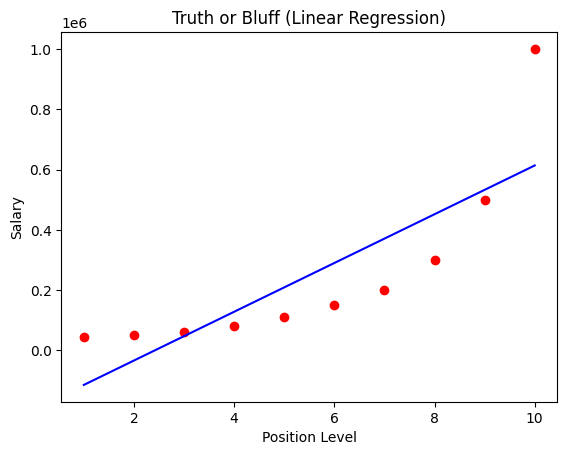

In [33]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

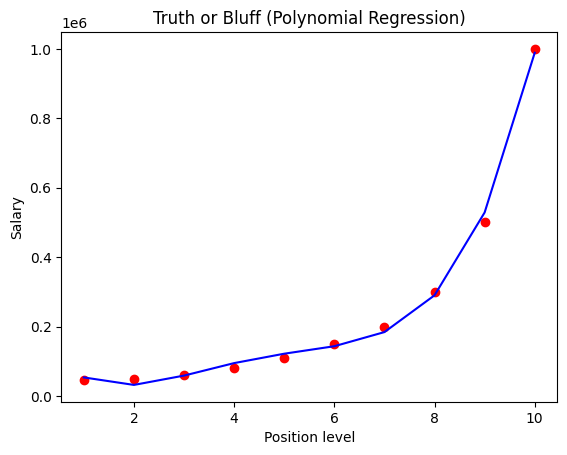

In [34]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

In [35]:
np.arange(min(X), max(X), 0.1)

C:\Users\user\AppData\Local\Temp\ipykernel_63464\3628362654.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  np.arange(min(X), max(X), 0.1)


array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

C:\Users\user\AppData\Local\Temp\ipykernel_63464\3763236140.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


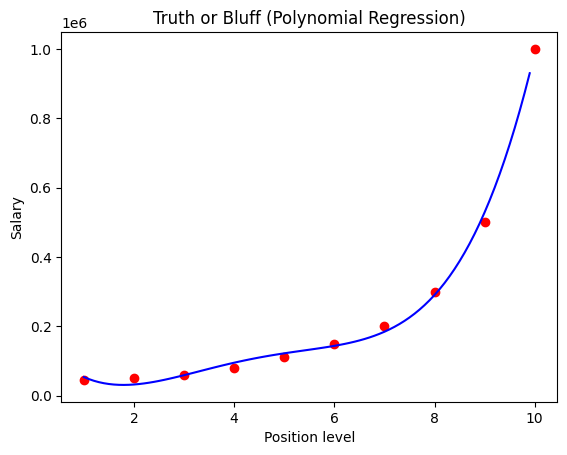

In [36]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [37]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [38]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))


array([158862.45265155])

# 範例: Polynomial Regression  
dataset description: https://archive.ics.uci.edu/ml/datasets/wine+quality  

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# df = pd.read_csv('./dataset/winequality-red.csv')

# y = df['quality']
# X = df.drop('quality',axis=1)

df = datasets.load_wine()

y = df["target"]
X = df["data"]

poly = PolynomialFeatures(degree=2).fit(X)
X = poly.transform(X)

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=1) #random_state 種子值


scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)


model = linear_model.LinearRegression()
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: {}\n'.format(model.coef_))
# The mean squared error
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('R2 score: {}'.format(r2_score(y_test, y_pred)))



Coefficients: [-7.42203408e+11 -2.47523945e+00  4.37588659e-01  2.71857619e+00
  6.07364571e-01 -2.11071610e+00 -2.41513512e+00  6.82424280e+00
 -8.05004723e-01 -2.74082493e+00  9.49853754e-01 -9.10103362e-01
 -2.01622941e+00  1.44932382e+00  8.71909449e-01  4.60312174e-01
 -2.83599481e+00 -1.00160022e+00  3.94896173e+00  4.65444666e-01
 -5.80378458e+00  1.94615918e+00  1.49480316e+00  3.18160790e+00
  1.28932402e+00  7.05235190e+00 -3.51669466e+00  1.11691012e-01
 -5.90795402e-01  9.37900053e-01  2.25882746e-01 -6.67251317e-02
 -5.72051254e-01 -1.20633717e+00  2.69111375e-01 -3.76207728e-01
  2.53531718e-01 -5.93458287e-01  2.28929415e-01  1.32290579e+00
 -2.31445339e-01 -2.06393385e+00  9.43910346e-02  1.59451976e+00
 -1.37461144e-01  1.37779803e-01  1.42356958e+00 -3.86849415e-01
 -1.64243368e+00 -8.95217704e-01  4.29953977e-02  8.86040388e-01
  2.15883877e-02 -4.59695255e-03 -4.93851277e-01 -3.13430724e-02
 -8.35858396e-01  2.15484089e-02 -8.26400837e-02  2.93965818e-01
  6.2925922